In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

y_train = np.zeros((len(Y_train), 10))
y_train[np.arange(len(Y_train)), Y_train] = 1 # to categorical
y_test = np.zeros((len(Y_test), 10))
y_test[np.arange(len(Y_test)), Y_test] = 1 # to categorical

x_train = X_train.reshape(-1, 28*28)/255 # 28*28 = 784
x_test = X_test.reshape(-1, 28*28)/255

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [27]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(784))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [26]:
"""Constructs the ML model used to predict handwritten digits."""

image = tf.keras.layers.Input(shape=(28, 28, 1))

y = tf.keras.layers.Conv2D(filters=32,
                         kernel_size=5,
                         padding='same',
                         activation='relu')(image)
y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                               strides=(2, 2),
                               padding='same')(y)
y = tf.keras.layers.Conv2D(filters=32,
                         kernel_size=5,
                         padding='same',
                         activation='relu')(y)
y = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
                               strides=(2, 2),
                               padding='same')(y)
y = tf.keras.layers.Flatten()(y)
y = tf.keras.layers.Dense(1024, activation='relu')(y)
y = tf.keras.layers.Dropout(0.4)(y)

probs = tf.keras.layers.Dense(10, activation='softmax')(y)

model = tf.keras.models.Model(image, probs, name='mnist')
"""
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.05, decay_steps=100000, decay_rate=0.96)
"""
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
"""
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy'])
"""
x_train = X_train/255 # 28*28 = 784
x_test = X_test/255

In [27]:


"""
model.compile(
    optimizer='adam',
    loss="mse",
    metrics=['accuracy']
)
"""

model.compile(
    optimizer='SGD',
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 139s 74ms/step - loss: 0.9492 - accuracy: 0.7037
Epoch 2/50
 306/1875 [===>..........................] - ETA: 2:02 - loss: 0.1642 - accuracy: 0.9507

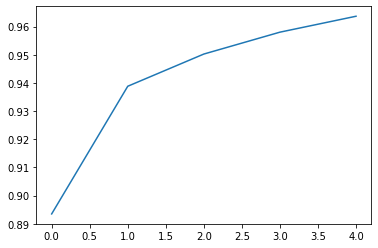

In [38]:
plt.plot(history.history["accuracy"], label="accuracy")

In [12]:
x_test[0].shape

(28, 28)

In [14]:
model.predict(x_test[0].reshape(1, 28, 28, 1))

array([[0.10073009, 0.10341159, 0.10197737, 0.0984206 , 0.09719002,
        0.10547365, 0.10306999, 0.08989204, 0.09627771, 0.10355696]],
      dtype=float32)

In [15]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), Y_test) # VAl_loss, VAL_acc

TypeError: 'NoneType' object is not callable

In [35]:
import cv2
for i in range(10):
    img = cv2.imread(f"images/{i}.png")
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img[img>20] = 255
    img = (255-img)/255
    print(model.predict(img.reshape(-1, 784)).argmax())

0
4
2
3
4
4
7
4
8
3


In [17]:
model.save("model_keras")

INFO:tensorflow:Assets written to: model_keras/assets


In [34]:
new_model = tf.keras.models.load_model("num.model")

In [40]:
np.argmax(model.predict(X_test), axis=1)

array([7, 2, 1, ..., 4, 5, 6])

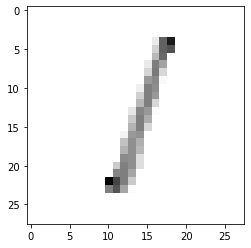

In [29]:
plt.imshow(X_test[2]*250, cmap=plt.cm.binary)

In [5]:
X_test[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
Y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
X_train[0].shape

(28, 28)